In [207]:
initial_path = 'peptide-QML'
# initial_path = '..'

In [208]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append(initial_path)

%load_ext autoreload
%autoreload 2
from my_code import helper_classes as c

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [209]:
colors = [
    (0.121, 0.466, 0.705),  # Blue
    (1.0, 0.498, 0.054),    # Orange
    (0.172, 0.627, 0.172),  # Green
    (0.839, 0.153, 0.157),  # Red
    (0.580, 0.404, 0.741),  # Purple
    (0.549, 0.337, 0.294),  # Brown
    (0.890, 0.466, 0.760),  # Pink
    (0.498, 0.498, 0.498),  # Grey
    (0.737, 0.741, 0.133),  # Olive Green
    (0.090, 0.745, 0.812),  # Cyan
    (0.682, 0.780, 0.909),  # Lighter Blue
    (1.0, 0.733, 0.471),    # Lighter Orange
    (0.596, 0.875, 0.541),  # Lighter Green
    (1.0, 0.598, 0.6),      # Lighter Red
    (0.772, 0.690, 0.835),  # Lighter Purple
    (0.768, 0.611, 0.580),  # Lighter Brown
    (0.969, 0.714, 0.824),  # Light Pink
    (0.780, 0.780, 0.780),  # Light Grey
    (0.858, 0.859, 0.552),  # Light Olive Green
    (0.619, 0.854, 0.898)   # Light Cyan
]

def plot_w_poly_fit(x, y, degree=2, options_data={}, options_fit={}):
    plt.plot(x, y, **options_data)
    z = np.polyfit(x, y, degree)
    p = np.poly1d(z)
    x_pred = np.linspace(min(x), max(x), 100)
    plt.plot(x_pred, p(x_pred), **options_fit)

In [210]:
sweep = c.Sweep.load(
    initial_path=initial_path,
    day='0914',
    file_name='sweep_12c_e-1',
)

In [211]:
sweep.lists.keys()

dict_keys(['idx', 'repetitions', 'n_layers_block', 'embedding_dim', 'model_uuid', 'best_loss_train', 'best_loss_test', 'loss_validation', 'time_train'])

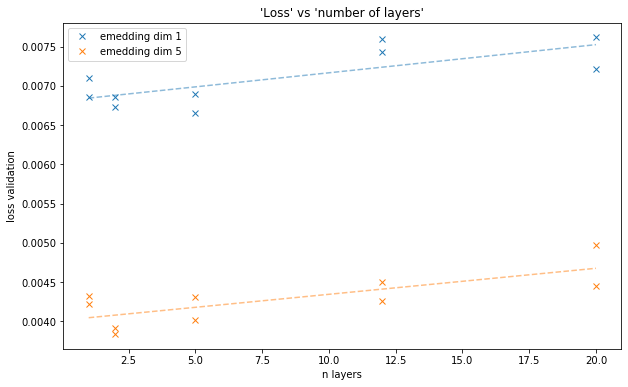

In [212]:
arrays = sweep.arrays

# plot
idx = -1
plt.figure(figsize=(10,6))
for i in [1,5]:
    idx += 1
    x = arrays['n_layers_block'][arrays['embedding_dim']==i]
    y = arrays['loss_validation'][arrays['embedding_dim']==i]

    plot_w_poly_fit(
        x, y, degree=1,
        options_data={'marker': 'x', 'linestyle': '', 'label': 'emedding dim {}'.format(i), 'color': colors[idx]},
        options_fit={'linestyle': '--', 'color': colors[idx], 'alpha': 0.5}
    )
plt.xlabel('n layers')
plt.ylabel('loss validation')
plt.legend()
# plt.xscale('log')
plt.title("'Loss' vs 'number of layers'")
plt.show()

In [213]:
sweep = c.Sweep.load(
    initial_path=initial_path,
    day='0914',
    file_name='sweep_12c_e_v2-1',
)

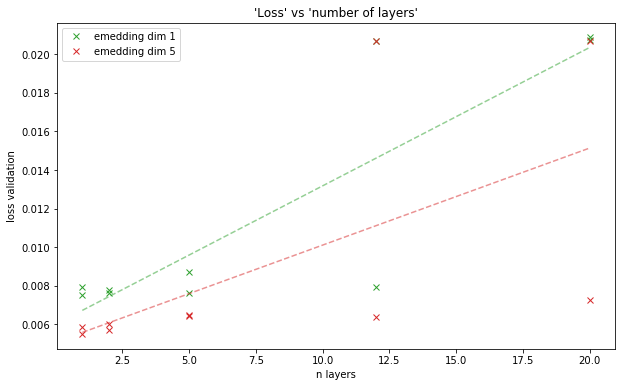

In [214]:
arrays = sweep.arrays

# plot
plt.figure(figsize=(10,6))
for i in [1,5]:
    idx += 1
    x = arrays['n_layers_block'][arrays['embedding_dim']==i]
    y = arrays['loss_validation'][arrays['embedding_dim']==i]

    plot_w_poly_fit(
        x, y, degree=1,
        options_data={'marker': 'x', 'linestyle': '', 'label': 'emedding dim {}'.format(i), 'color': colors[idx]},
        options_fit={'linestyle': '--', 'color': colors[idx], 'alpha': 0.5}
    )

plt.xlabel('n layers')
plt.ylabel('loss validation')
plt.legend()
# plt.xscale('log')
plt.title("'Loss' vs 'number of layers'")
plt.show()

In [215]:
sweep = c.Sweep.load(
    initial_path=initial_path,
    day='0912',
    file_name='sweep_12h_e_Am_Xqm-1',
)

In [216]:
arrays = sweep.arrays_trimmed

In [217]:
arrays.keys()

dict_keys(['idx', 'repetitions', 'n_layers_quantum_block', 'n_qubits', 'qubits_measurement', 'model_uuid', 'best_loss_train', 'best_loss_test', 'loss_validation', 'time_train'])

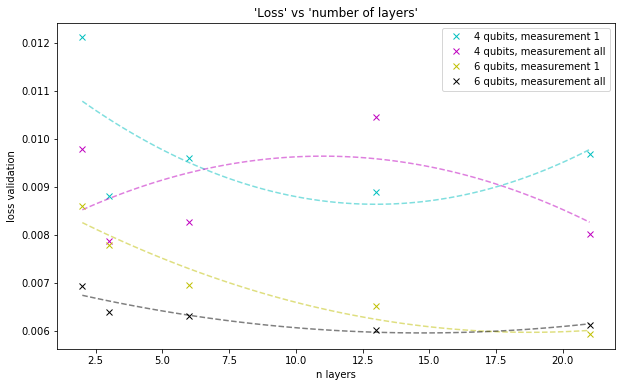

In [218]:
# list of colors
colors = ['b', 'g', 'r', 'orange', 'c', 'm', 'y', 'k', 'w']

# plot
plt.figure(figsize=(10,6))
for qubits in [4,6]:
    for measurement in ['1','all']:    
        idx += 1
        points_to_plot = (arrays['n_qubits'] == qubits) & (arrays['qubits_measurement'] == measurement)
        x = arrays['n_layers_quantum_block'][points_to_plot] + np.ones_like(arrays['n_layers_quantum_block'][points_to_plot])
        y = arrays['loss_validation'][points_to_plot]

        plot_w_poly_fit(
            x, y, degree=2,
            options_data={'marker': 'x', 'linestyle': '', 'label': '{} qubits, measurement {}'.format(qubits, measurement), 'color': colors[idx]},
            options_fit={'linestyle': '--', 'color': colors[idx], 'alpha': 0.5}
        )

plt.xlabel('n layers')
plt.ylabel('loss validation')
plt.legend()
# plt.xscale('log')
plt.title("'Loss' vs 'number of layers'")
plt.show()